## Corrélation



![img](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



## Régression linéaire



-   statistiques descriptives (corrélation) → modèle → statistiques inductives
-   variables explicatives → variable cible (numériques)
-   interpolation, extrapolation



In [76]:
import pandas as pd
df_galton= pd.read_csv("../../data/Heights/Galton.txt", sep='\t')

In [77]:
males=df_galton.loc[df_galton['Gender']=='M'].groupby('Family')[['Father','Mother','Height']].first().groupby('Father').first().reset_index()

In [78]:
import seaborn as sns; sns.set_context("talk")
sns.set(style = 'white')
import matplotlib.pyplot as plt

## Corrélation →relation linéaire



On peut visualiser par exemple la corrélation entre la taille d'un
échantillon d'hommes et celle de leur père :



In [79]:
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
g = sns.JointGrid(x="Father", y="Height", data=df_galton[df_galton['Gender']=='M'])
g = g.plot_joint(plt.scatter, color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
r,p_value=pearsonr(df_galton[df_galton['Gender']=='M']['Father'],df_galton[df_galton['Gender']=='M']['Height'])
g.ax_joint.text(62.5,77,f"pearson R={r:.4E}\np value={p_value:.4E}");

Pour plus de lisibilité on va choisir seulement 10 points :



In [80]:
sample=males.sample(10,random_state=42)

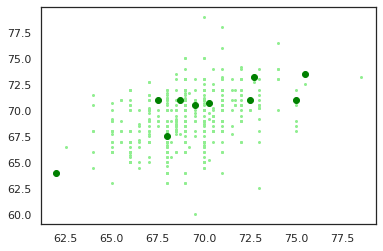

In [81]:
plt.scatter(df_galton[df_galton['Gender']=='M']['Father'], df_galton[df_galton['Gender']=='M']['Height'],s=4, c = 'lightgreen')
plt.scatter(sample['Father'], sample['Height'], c = 'green')

In [82]:
sample=males.sample(10,random_state=42)
g = sns.JointGrid(x="Father", y="Height", data=sample)
g = g.plot_joint(plt.scatter, color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
r,p_value=pearsonr(sample['Father'],sample['Height'])
g.ax_joint.text(62.5,72,f"pearson R={r:.4E}\np value={p_value:.4E}");

In [83]:
! yes|conda install statsmodels

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

yes: standard output: Broken pipe


In [84]:
import numpy as np
import statsmodels.api as sm
import warnings; warnings.simplefilter('ignore')
target="Height"
data = sm.add_constant(sample, prepend=False)
mod = sm.OLS(data[target],data[['Father','const']])
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     19.86
Date:                Mon, 12 Apr 2021   Prob (F-statistic):            0.00212
Time:                        07:01:51   Log-Likelihood:                -17.559
No. Observations:                  10   AIC:                             39.12
Df Residuals:                       8   BIC:                             39.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Father         0.5800      0.130      4.456      0.002       0.280       0.880
const         29.6419      9.146      3.241      0.012       8.550      50.733
==============================================================================
Omnibus:                        1.149   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                0.664
Skew:                          -0.040   Prob(JB):                        0.717
Kurtosis:                       1.740   Cond. No.                     1.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Modèle linéaire d'ordre 1



On peut modéliser les points par une droite :



In [85]:
import seaborn as sns; sns.set_context("talk")
sns.set(style = 'white')
import matplotlib.pyplot as plt
ax=sns.regplot(x="Father", y=target, data=sample, order=1, ci=None,scatter_kws={'color': "blue", 'alpha': 0.3}, line_kws={'color': "green"})

### Somme des erreurs quadratiques (Sum of Squared Errors)



On calcule les paramèteres de la droite dont les points sont le moins éloignés, le plus souvent en minimisant la **SSE** :



In [86]:
import seaborn as sns; sns.set_context("talk")
sns.set(style = 'white')
import matplotlib.pyplot as plt
ax=sns.regplot(x="Father", y=target, data=sample, order=1, ci=None,scatter_kws={"color": "blue", 'alpha': 0.3}, line_kws={"color": "green"})
pred_1=res.fittedvalues.values #=res.predict(data.drop(target,axis=1)).values
sse=0
for i,t in enumerate(data.itertuples()):
    sse+=(t.Height -pred_1[i])**2
    ax.vlines(t.Father, t.Height, pred_1[i], linewidth=2,color="red")

ax.text(70, 65,
     "$sse=\\sum{{(y-\\overline{{y}})^2}}$={0:.4g}".format(sse), horizontalalignment='center', fontsize=17, color="red")
ax.text(65, 73.5,
     "$\\overline{{y}}={0:.2g} x + {1:.2g}$".format(res.params["Father"], res.params["const"]), horizontalalignment='center', fontsize=17, color="green")
plt.show()

In [87]:
data['Father^2']=data['Father']**2
mod_2 = sm.OLS(data[target],data[['Father^2','Father','const']])
res_2=mod_2.fit()

In [88]:
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     13.76
Date:                Mon, 12 Apr 2021   Prob (F-statistic):            0.00375
Time:                        07:01:51   Log-Likelihood:                -15.819
No. Observations:                  10   AIC:                             37.64
Df Residuals:                       7   BIC:                             38.54
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Father^2      -0.0418      0.024     -1.707      0.131      -0.100       0.016
Father         6.3678      3.392      1.877      0.103      -1.652      14.388
const       -169.9274    117.169     -1.450      0.190    -446.989     107.134
==============================================================================
Omnibus:                        0.514   Durbin-Watson:                   2.389
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.540
Skew:                          -0.292   Prob(JB):                        0.764
Kurtosis:                       2.023   Cond. No.                     1.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
def num2tex(fmt, f):
    return r'{} \times 10^{{{}}}'.format(*fmt.format(f).split("e+"))

## Modèles d'ordres supérieurs



On peut toujours minimiser la *SSE* avec un modèle d'ordre supérieur
(ici 2 et 3), mais ce n'est pas forcément une bonne idée :



In [90]:
ax=sns.regplot(x="Father", y=target, data=sample, order=2, ci=None,scatter_kws={"color": "blue", 'alpha': 0.3}, line_kws={"color": "green"})
pred_2=res_2.fittedvalues.values #=res.predict(data.drop(target,axis=1)).values
sse=0
for i,t in enumerate(data.itertuples()):
    sse+=(t.Height -pred_2[i])**2
    ax.vlines(t.Father, t.Height, pred_2[i], linewidth=2,color="red")

ax.text(70, 65,
     "$sse=\\sum{{(y-\\overline{{y}})^2}}$={0:.4g}".format(sse), horizontalalignment='center', fontsize=17, color="red")
ax.text(67, 73,
     "$\\overline{{y}}={0:.2g} x^2 + {1:.2g} x {2}$".format(res_2.params["Father^2"],res_2.params["Father"], num2tex("{:.2g}",res_2.params["const"])), horizontalalignment='center', fontsize=15, color="green")
plt.show()

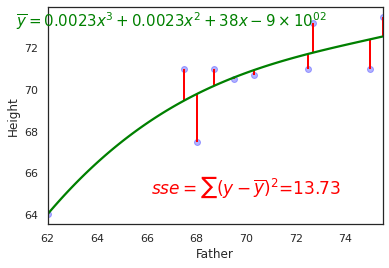

In [91]:
data['Father^3']=data['Father']**3
mod_3 = sm.OLS(data[target],data[['Father^3','Father^2','Father','const']])
res_3=mod_3.fit()
ax=sns.regplot(x="Father", y=target, data=sample, order=3, ci=None,scatter_kws={"color": "blue", 'alpha': 0.3}, line_kws={"color": "green"})
pred_3=res_3.fittedvalues.values #=res.predict(data.drop(target,axis=1)).values
sse=0
for i,t in enumerate(data.itertuples()):
    sse+=(t.Height -pred_3[i])**2
    ax.vlines(t.Father, t.Height, pred_3[i], linewidth=2,color="red")

ax.text(70, 65,
     "$sse=\\sum{{(y-\\overline{{y}})^2}}$={0:.4g}".format(sse), horizontalalignment='center', fontsize=17, color="red")
ax.text(67, 73,
     "$\\overline{{y}}={0:.2g} x^3 + {1:.2g} x^2 + {2:.2g} x {3}$".format(res_3.params["Father^3"],res_3.params["Father^3"],res_3.params["Father"], num2tex("{:.2g}",res_3.params["const"])), horizontalalignment='center', fontsize=15, color="green")
plt.show()

## Modèles en dimensions 2 et plus



On peut aussi avoir un modèles linéaire d'ordre 1 avec 2 (ou plus)
variables explicatives. Le modèles est alors un plan (ou un
hyperplan):



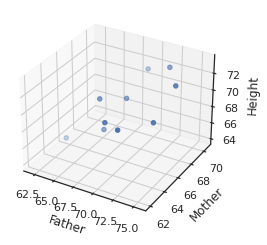

In [92]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np
mod2d = sm.OLS(data[target],data[['Father','Mother','const']])
res2d=mod2d.fit()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sample['Father'], sample['Mother'],sample['Height'])
xx, yy = np.meshgrid(range(int(min(sample['Father'])), int(max(sample['Father']))+1), range(int(min(sample['Mother'])), int(max(sample['Mother']))+1))
ax.set_xlabel('Father')
ax.set_ylabel('Mother')
ax.set_zlabel('Height');

## SSE en dimension 2



On cherche alors à minimiser la somme des distances au plan :



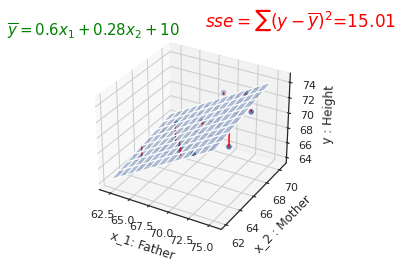

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sample['Father'], sample['Mother'],sample['Height'])
xx, yy = np.meshgrid(range(int(min(sample['Father'])), int(max(sample['Father']))+1), range(int(min(sample['Mother'])), int(max(sample['Mother']))+1))
exog = pd.DataFrame({'Father': xx.ravel(), 'Mother': yy.ravel(), 'const':1.})
zz = res2d.predict(exog = exog).values.reshape(xx.shape)
ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, alpha = 0.4)
pred2d= res2d.fittedvalues.values
sse=0
for i,t in enumerate(data.itertuples()):
    sse+=(t.Height -pred2d[i])**2
    ax.plot([t.Father,t.Father],[t.Mother, t.Mother], [t.Height,pred2d[i]], c='red')
ax.set_xlabel('x_1: Father')
ax.set_ylabel('x_2 : Mother')
ax.set_zlabel('y : Height')
ax.text2D(0.05, 0.95, "$\\overline{{y}}={0:.2g} x_1 + {1:.2g} x_2 + {2:.2g}$".format(res2d.params["Father"],res2d.params["Mother"],res2d.params["const"], num2tex("{:.2g}",res_3.params["const"])), horizontalalignment='center', fontsize=15, color="green", transform=ax.transAxes);
ax.text2D(1, 1,
     "$sse=\\sum{{(y-\\overline{{y}})^2}}$={0:.4g}".format(sse), horizontalalignment='center', fontsize=17, color="red", transform=ax.transAxes);

## Importance de la visualisation



De même que pour la corrélation (et pour les mêmes raisons), il est essentiel de visualiser les données et le modèle pour valider sa pertinence :



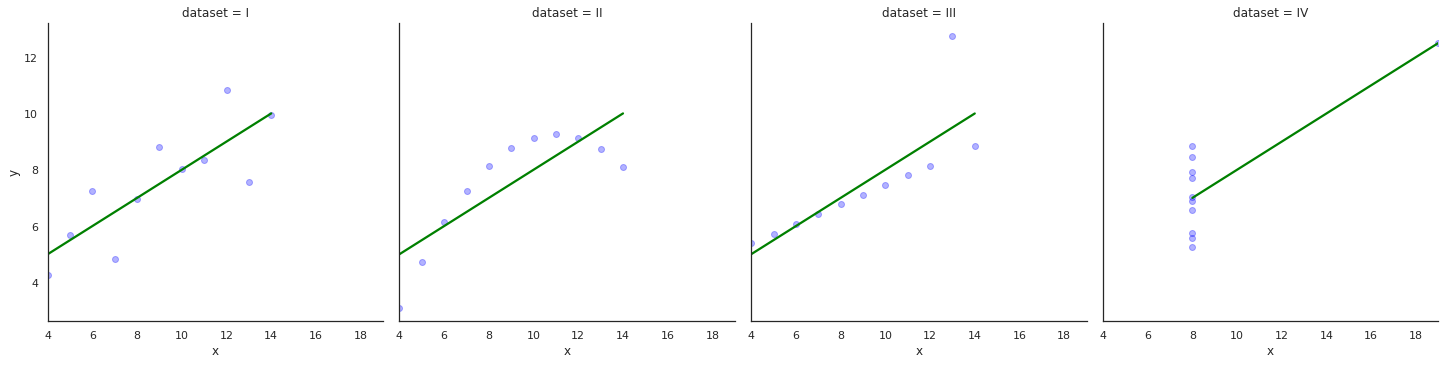

In [94]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe, col='dataset', ci=None,scatter_kws={"color": "blue", 'alpha': 0.3}, line_kws={"color": "green"});

## En pratique



On va utiliser *statsmodels* et *scikit-learn* pour calculer notre modèle linéaire.

D'abord, on charge le classique [jeu de données 'iris'](https://fr.wikipedia.org/wiki/Iris_de_Fisher) qui décrit des
iris avec les mesures des pétales et des sépales et le nom de l'espèce précise :

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Petal-sepal.jpg/451px-Petal-sepal.jpg)



In [95]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

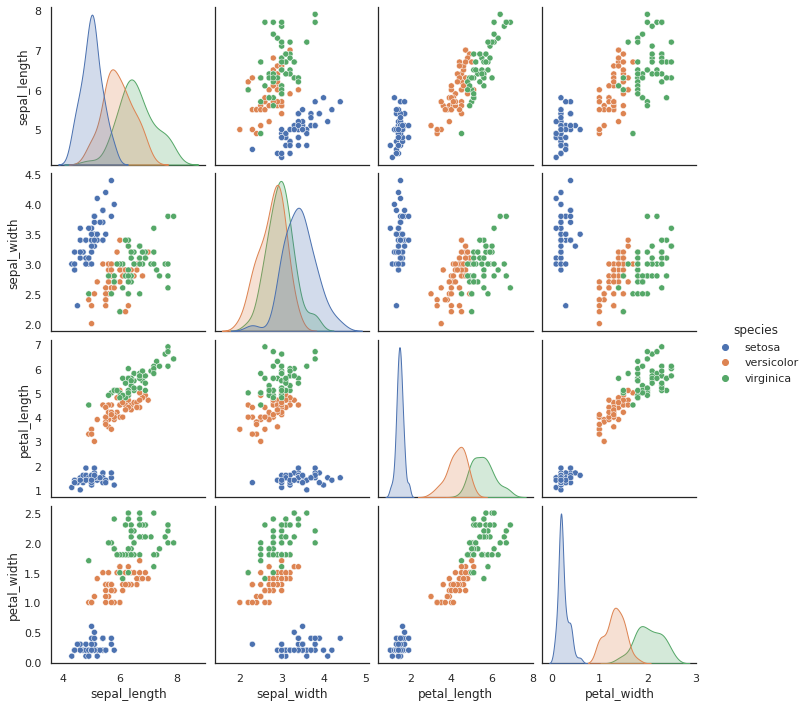

In [96]:
sns.pairplot(iris, hue="species");

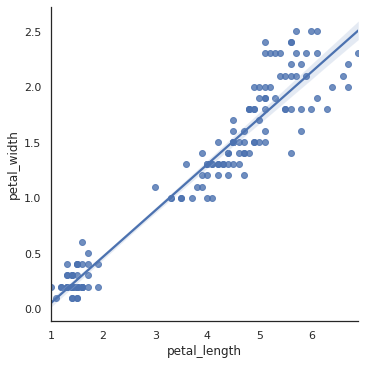

In [97]:
sns.lmplot(x="petal_length", y="petal_width", data=iris)

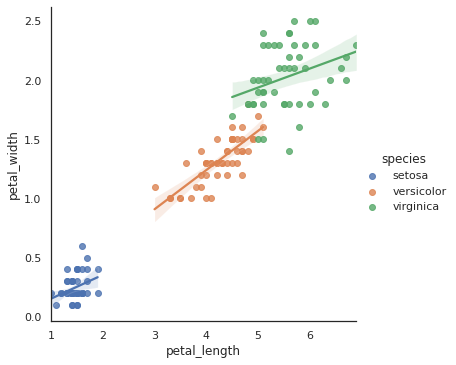

In [98]:
sns.lmplot(x="petal_length", y="petal_width", data=iris, hue='species')

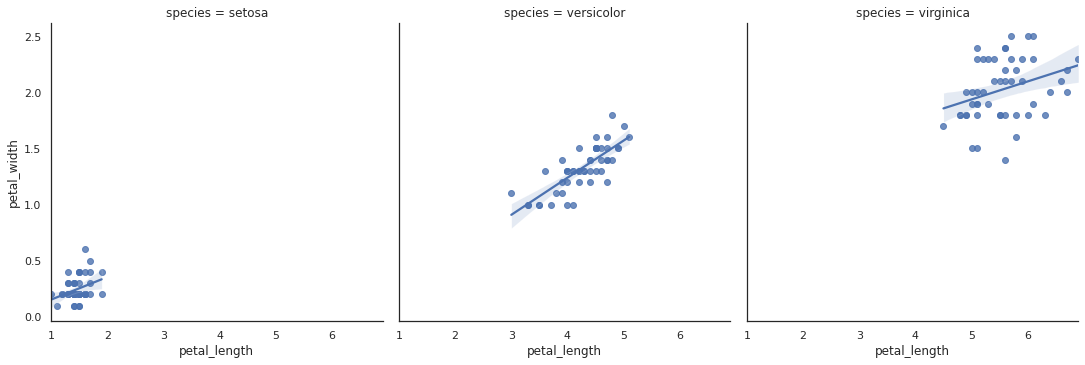

In [99]:
sns.lmplot(x="petal_length", y="petal_width", data=iris, col='species')

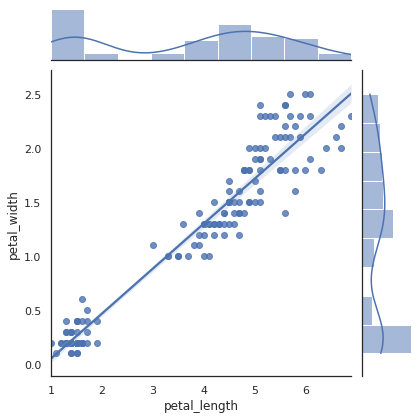

In [100]:
sns.jointplot(x='petal_length', y='petal_width', data=iris, kind='reg')

In [101]:
sns.jointplot(x='petal_length', y='petal_width', data=iris, kind='resid')

In [102]:
from scipy import stats
import matplotlib.pyplot as plt
g = sns.JointGrid(x="petal_length", y="petal_width", data=iris)
g = g.plot_joint(plt.scatter, color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
r,p_value=pearsonr(iris['petal_length'],iris['petal_width'])
g.ax_joint.text(1, 2.2,f"pearson R={r:.4E}\np value={p_value:.4E}");

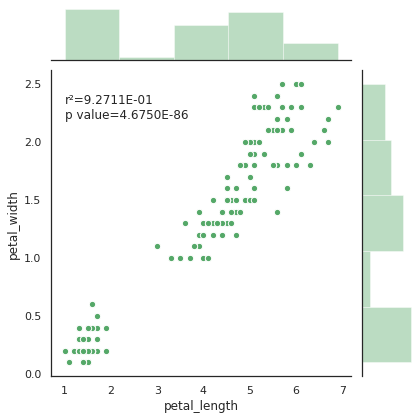

In [103]:
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = sns.JointGrid(x="petal_length", y="petal_width", data=iris)
g = g.plot_joint(plt.scatter, color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
r,p_value=pearsonr(iris['petal_length'],iris['petal_width'])
r_sq=r**2
g.ax_joint.text(1, 2.2,f"r²={r_sq:.4E}\np value={p_value:.4E}");

In [104]:
anscombe = sns.load_dataset("anscombe")

In [105]:
sns.lmplot(x="x", y="y", data=anscombe, col='dataset')

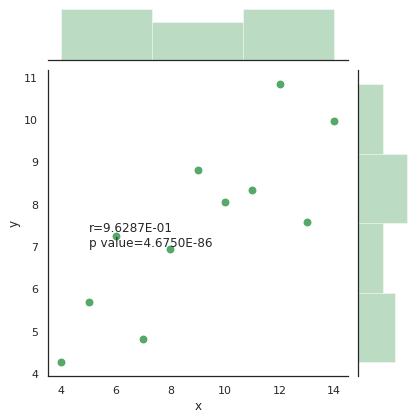

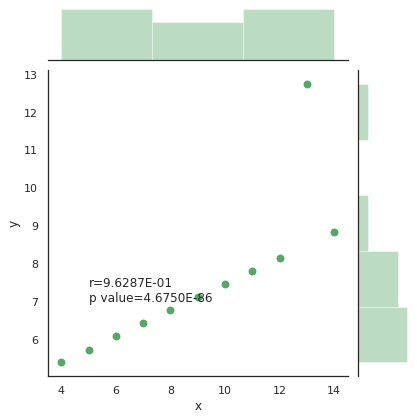

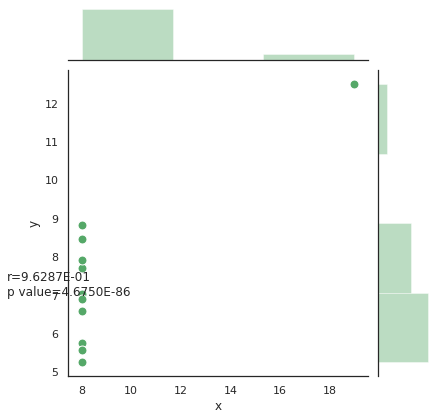

In [106]:
def plot_anscombe(i):
    i_n=['I','II','III','IV']
    g = sns.JointGrid(x="x", y="y", data=anscombe.query("dataset == '%s'"%i_n[i]))
    g = g.plot_joint(plt.scatter, color="g", s=80, edgecolor="white")
    g = g.plot_marginals(sns.distplot, kde=False, color="g")
    r,p_value=pearsonr(iris['petal_length'],iris['petal_width'])
    g.ax_joint.text(5, 7,f"r={r:.4E}\np value={p_value:.4E}");
    return g
for i in range(4):
    plot_anscombe(i)

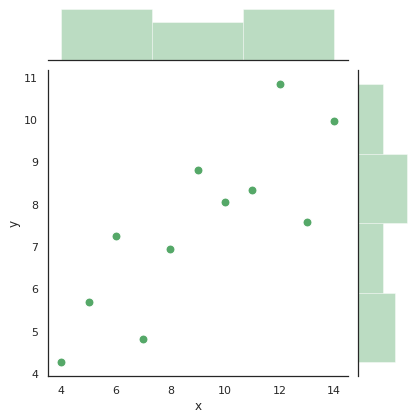

In [107]:
g = sns.JointGrid(x="x", y="y", data=anscombe.query("dataset == 'I'"))
g = g.plot_joint(plt.scatter, color="g", s=80, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
#g = g.annotate(stats.pearsonr, loc="upper left", fontsize=12)

In [108]:
from sklearn import linear_model
model = linear_model.LinearRegression()
results = model.fit(iris[["petal_length"]], iris['petal_width'])
print("The best linear modeling is petal_width= %f + %f×petal_length" %(results.intercept_, results.coef_))

The best linear modeling is petal_width= -0.363076 + 0.415755×petal_length


In [109]:
import statsmodels.api as sm
model = sm.OLS(iris['petal_width'],iris[['petal_length']])# arguments order is the opposite of  sklearn.linear_model !
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            petal_width   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              4417.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):                   1.22e-112
Time:                        07:02:06   Log-Likelihood:                         -8.7179
No. Observations:                 150   AIC:                                      19.44
Df Residuals:                     149   BIC:                                      22.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Le coefficient n'est pas le même que celui que nous avions avec
`sklearn.linear_model`. Ceci estd dû au fait que cette dernière avait
automatiquement ajouté un terme pour l'ordonnée à l'origine
(*intercept*) alors qu'il faut faire cela explicitement avec
`statsmodels` :



In [110]:
model = sm.OLS(iris['petal_width'],sm.add_constant(iris['petal_length'], prepend=False))# arguments order is the opposite of  sklearn.linear_model !
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           4.68e-86
Time:                        07:02:06   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
petal_length     0.4158      0.010     43.387   

On peut afficher le résultat de la régression avec `statsmodels` :



In [111]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results, "petal_length", fig=fig)

Bien sûr, on peut ajouter d'autres variables explicatives :



In [112]:
from sklearn import linear_model
model = linear_model.LinearRegression()
results = model.fit(iris[["petal_length","sepal_length"]], iris['petal_width'])
print("The best linear model is petal_width= %f + %f×petal_length + %f×sepal_length" %
      (results.intercept_, results.coef_[0], results.coef_[1]))

The best linear model is petal_width= -0.008996 + 0.449376×petal_length + -0.082218×sepal_length


## Paramètres et visualisation : jeu de données Anscombe



In [113]:
anscombe = sns.load_dataset("anscombe")

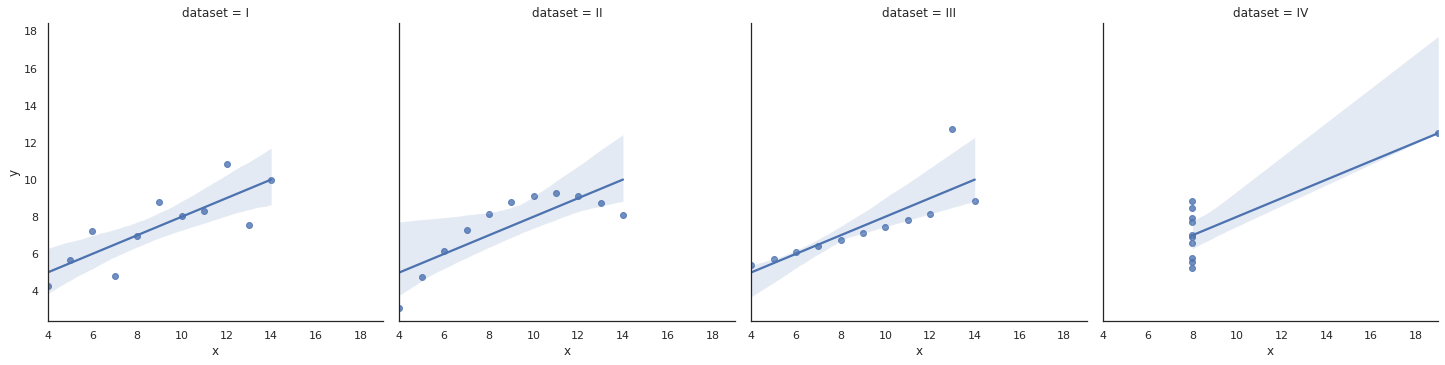

In [114]:
sns.lmplot(x="x", y="y", data=anscombe, col='dataset')